In [113]:
library(ggplot2)
library(ks)
library(HSAUR2)
library(outliers)
library(MASS)
library(boot)
library(nortest)
library(car)
library(Hmisc)

,Gender,Height,Weight
,<chr>,<dbl>,<dbl>
1,Male,73.84702,241.8936
2,Male,68.78190,162.3105
3,Male,74.11011,212.7409
4,Male,71.73098,220.0425
5,Male,69.88180,206.3498
6,Male,67.25302,152.2122


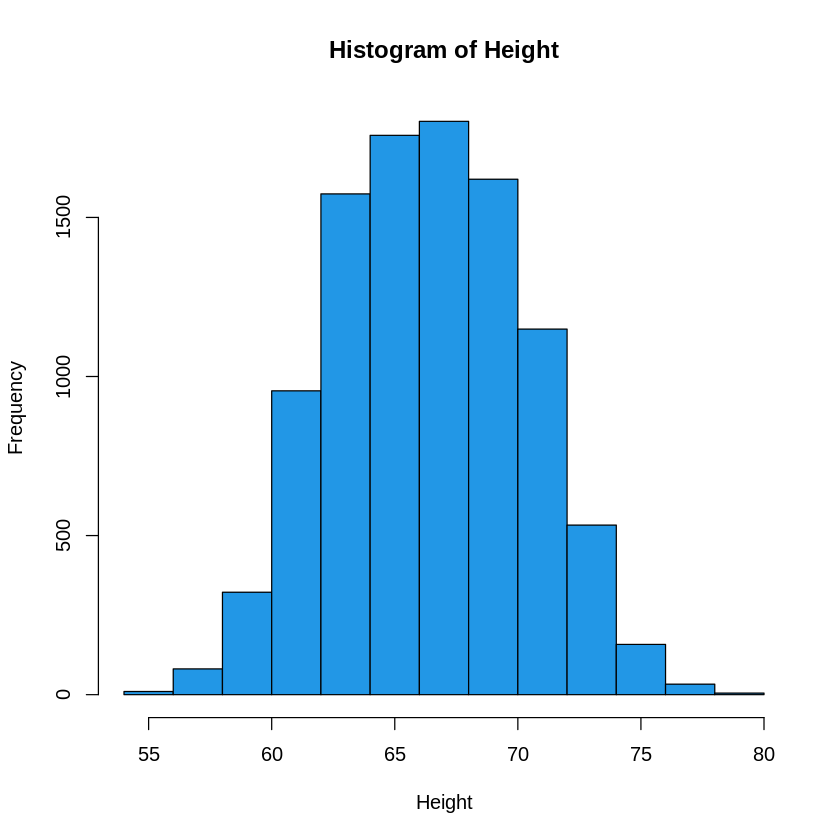

In [3]:
data <- read.csv('weight-height.csv')
head(data)
Height <- data$Height
hist(Height, col = 4)

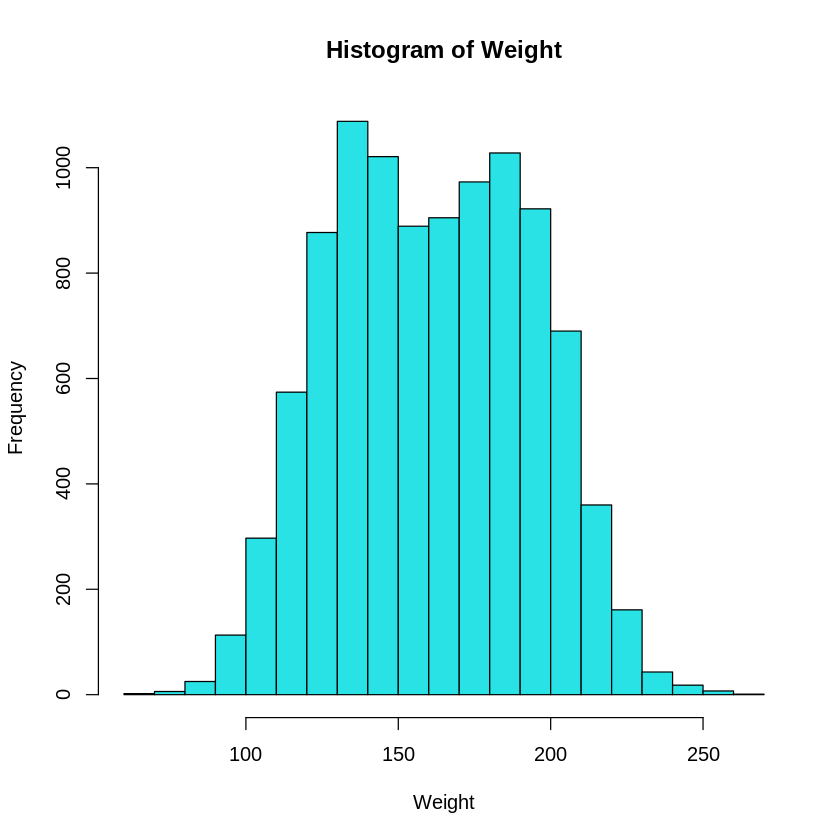

In [4]:
Weight <- data$Weight
hist(Weight, col = 5)

Warning message:
“no DISPLAY variable so Tk is not available”


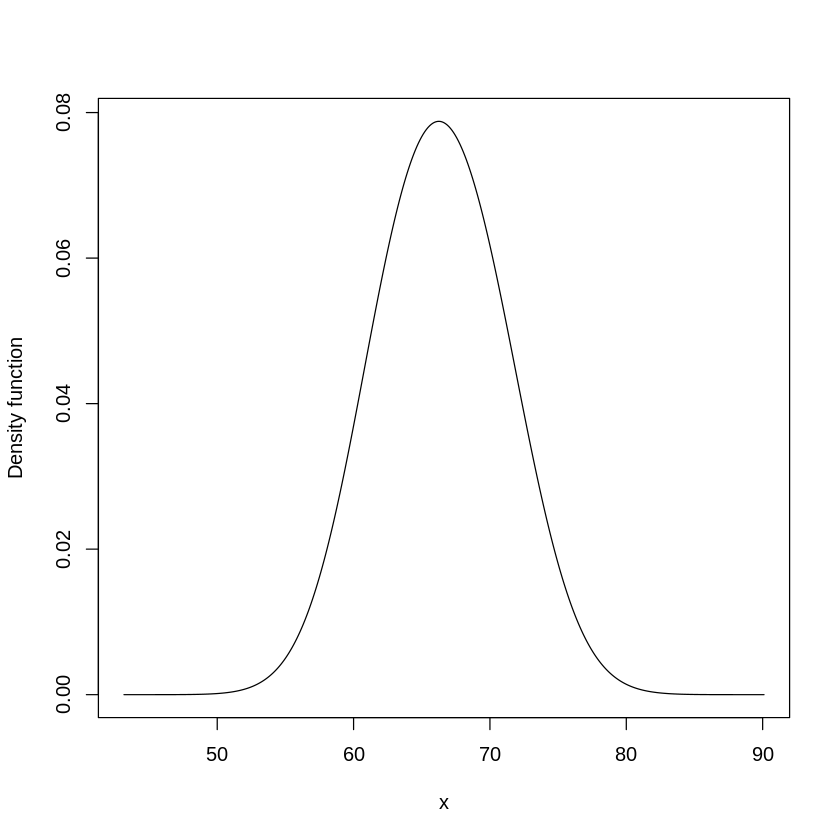

In [5]:
Height <- data$Height
dens <- kde(Height, h=3)
plot(dens)

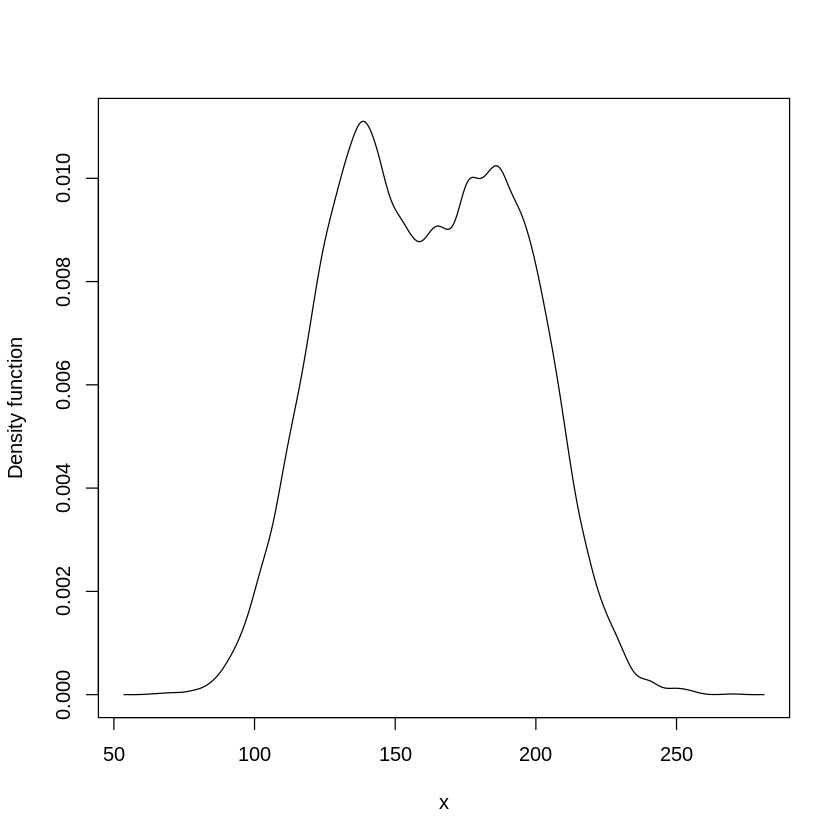

In [6]:
Weight <- data$Weight
dens <- kde(Weight, h=3)
plot(dens)

In [10]:
df <- read.csv('FilmPreferences2123.csv')
df1 <- df$income 
df2 <- df$sex

In [11]:
summary(df)

      sex              age            educat          income    
 Min.   :0.0000   Min.   :18.00   Min.   :1.000   Min.   : 200  
 1st Qu.:0.0000   1st Qu.:23.25   1st Qu.:1.000   1st Qu.:1305  
 Median :1.0000   Median :32.00   Median :2.000   Median :2138  
 Mean   :0.5333   Mean   :35.86   Mean   :1.933   Mean   :2200  
 3rd Qu.:1.0000   3rd Qu.:46.00   3rd Qu.:2.000   3rd Qu.:2820  
 Max.   :1.0000   Max.   :69.00   Max.   :3.000   Max.   :5800  
    thriller          horror           comedy          adventur    
 Min.   : 2.000   Min.   : 1.000   Min.   : 3.000   Min.   : 4.00  
 1st Qu.: 6.000   1st Qu.: 3.000   1st Qu.: 7.000   1st Qu.: 7.00  
 Median : 7.000   Median : 4.000   Median : 8.000   Median : 8.00  
 Mean   : 7.013   Mean   : 4.353   Mean   : 7.373   Mean   : 7.66  
 3rd Qu.: 9.000   3rd Qu.: 6.000   3rd Qu.: 8.000   3rd Qu.: 9.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
      docu           roman             munt          movies       tus

In [12]:
sorted_df = sort(df$income)

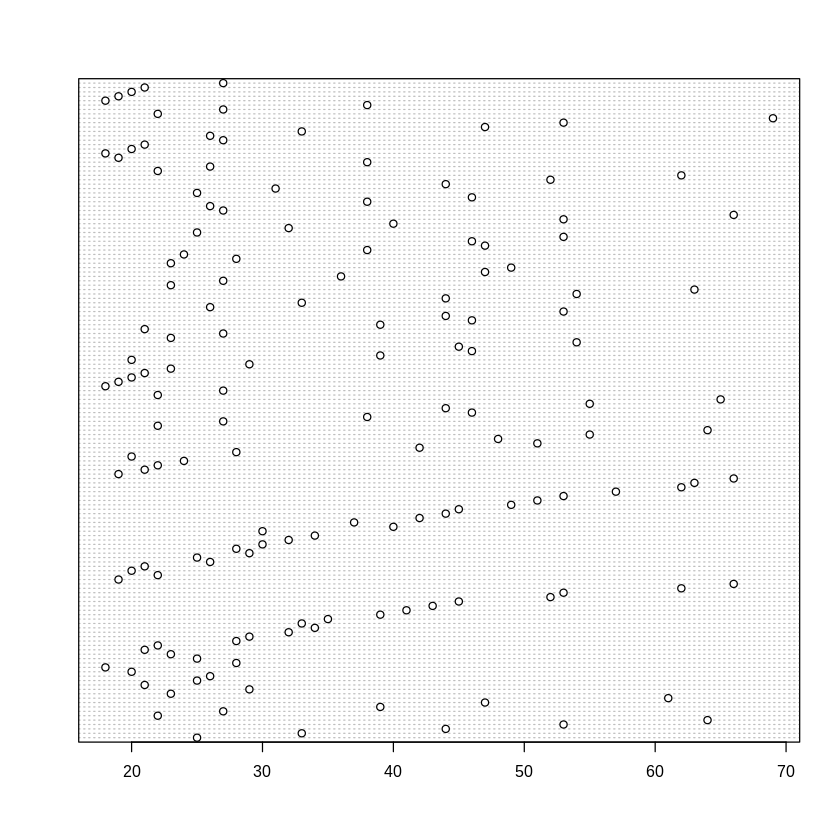

In [13]:
dotchart(df$age, labels = row.names(sorted_df), cex = 0.8)

In [14]:
df = read.csv('StudentsPerformance.csv')

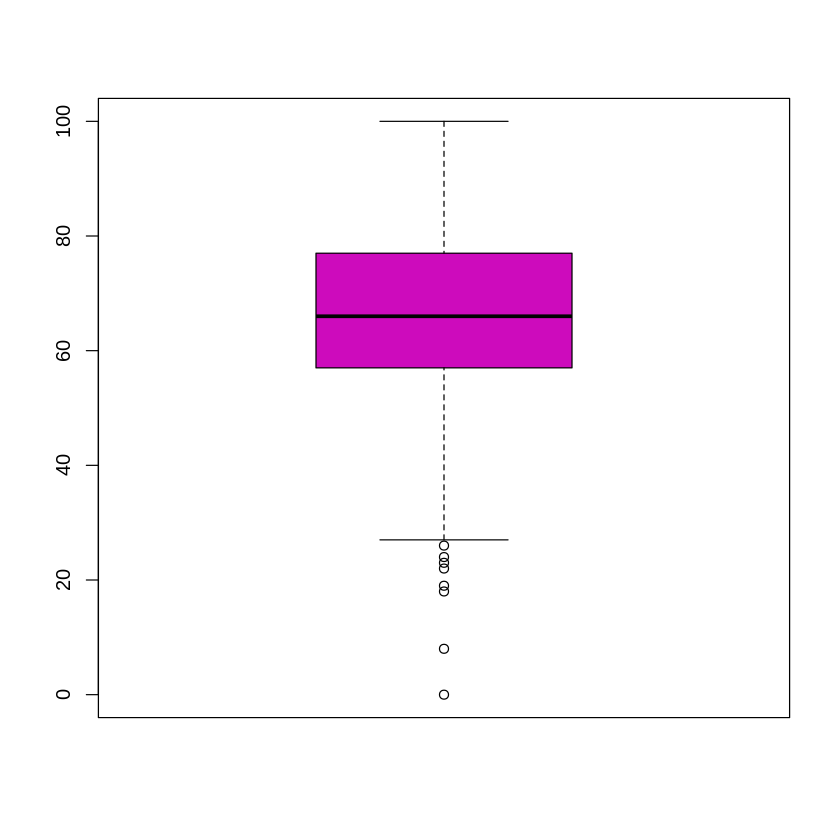

In [15]:
boxplot(df$math.score, col = 6, data = df)

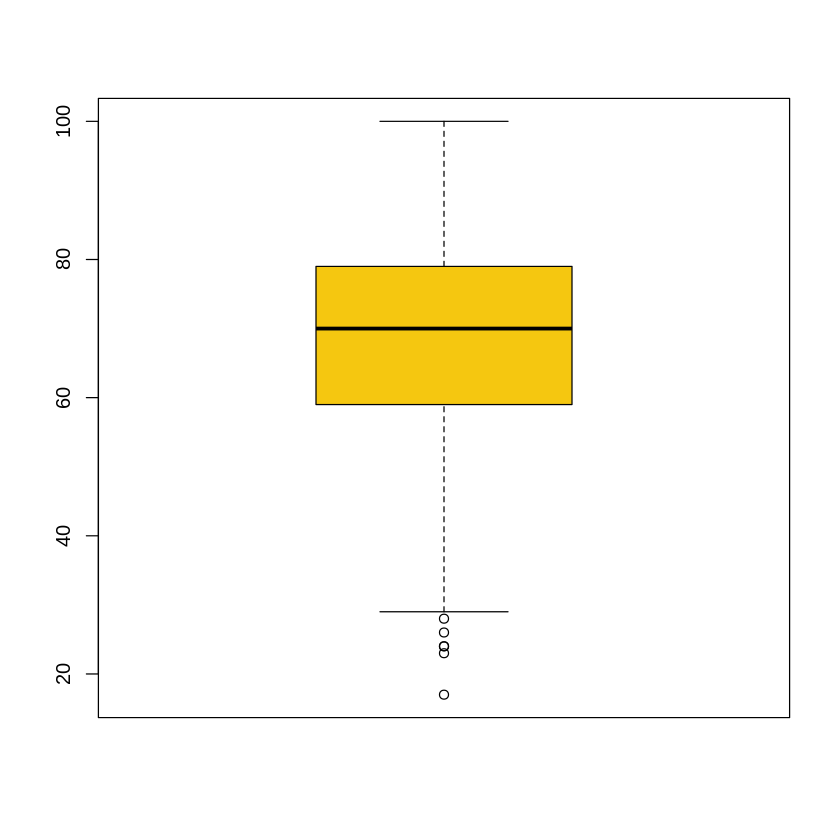

In [16]:
boxplot(df$reading.score, col = 7, data = df)

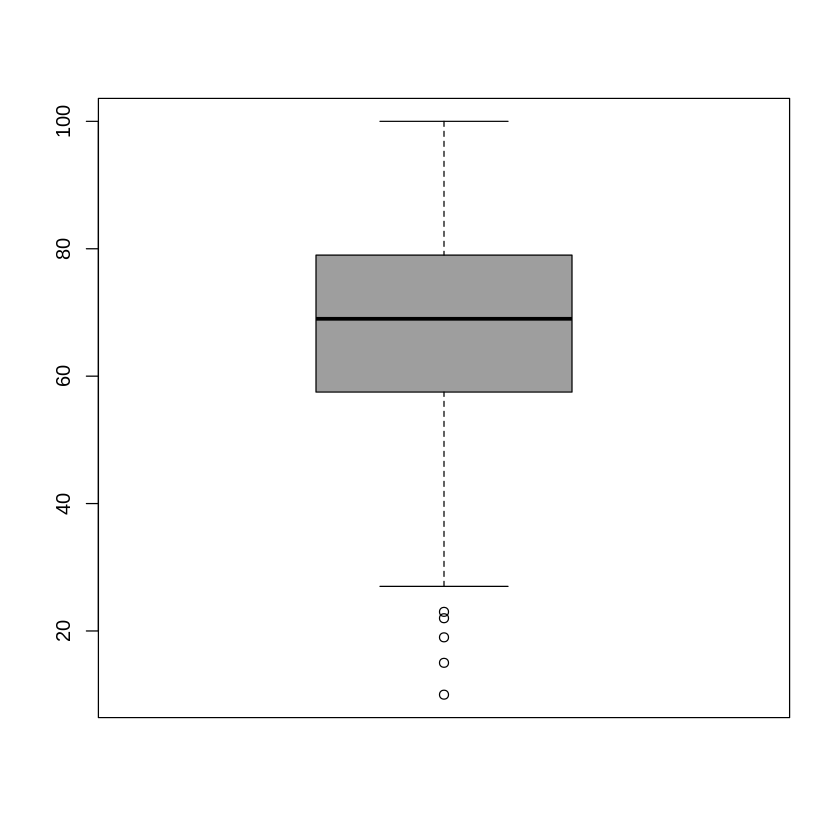

In [17]:
boxplot(df$writing.score, col = 8, data = df)

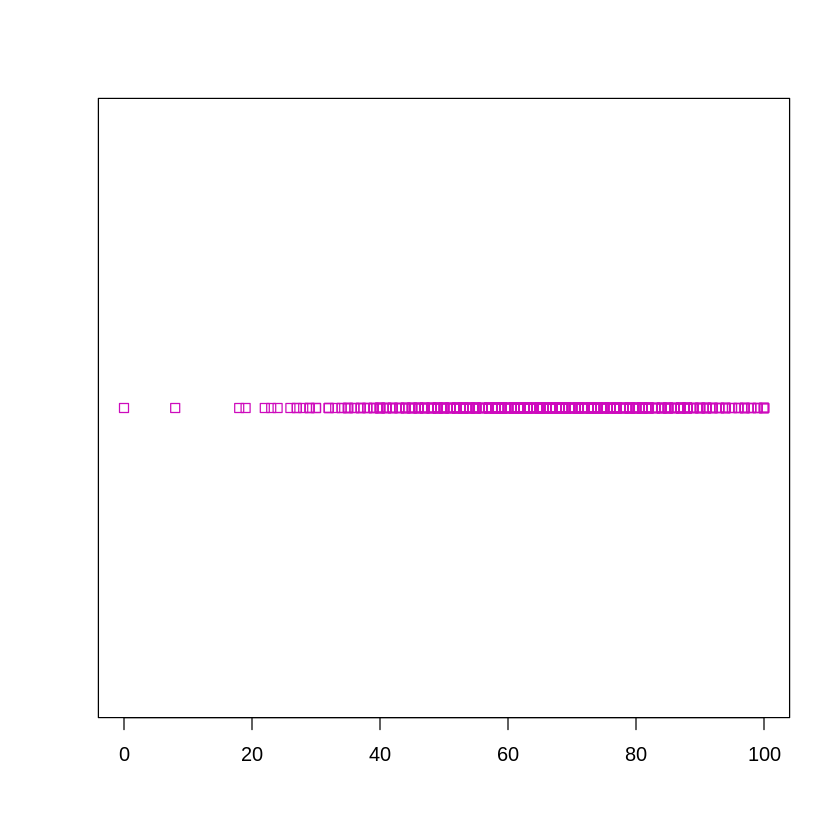

In [18]:
stripchart(df$math.score, col = 6)

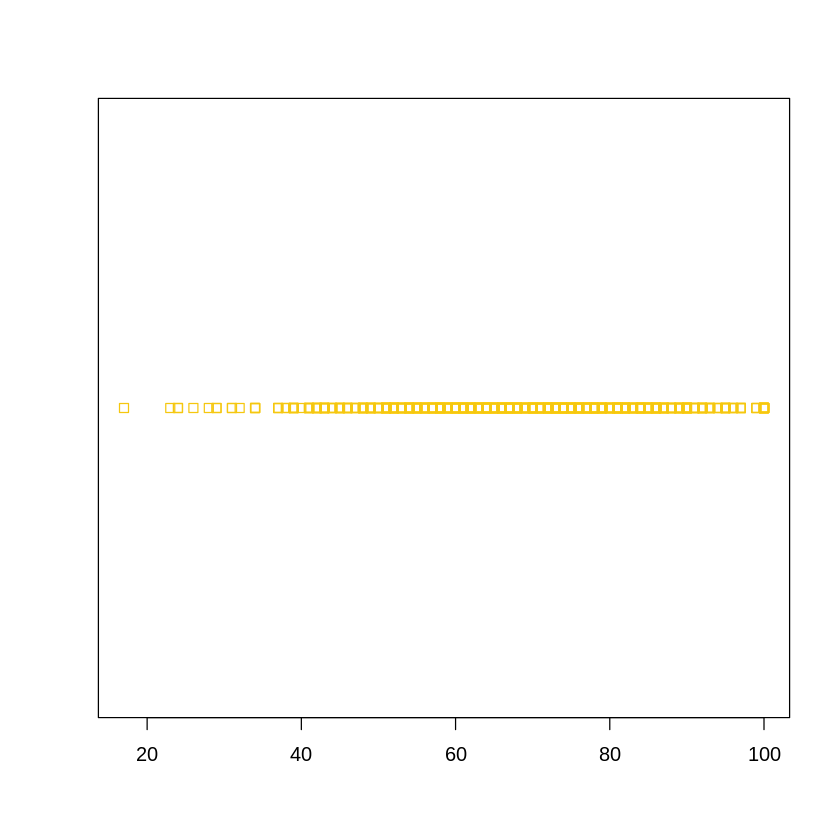

In [19]:
stripchart(df$reading.score, col = 7)

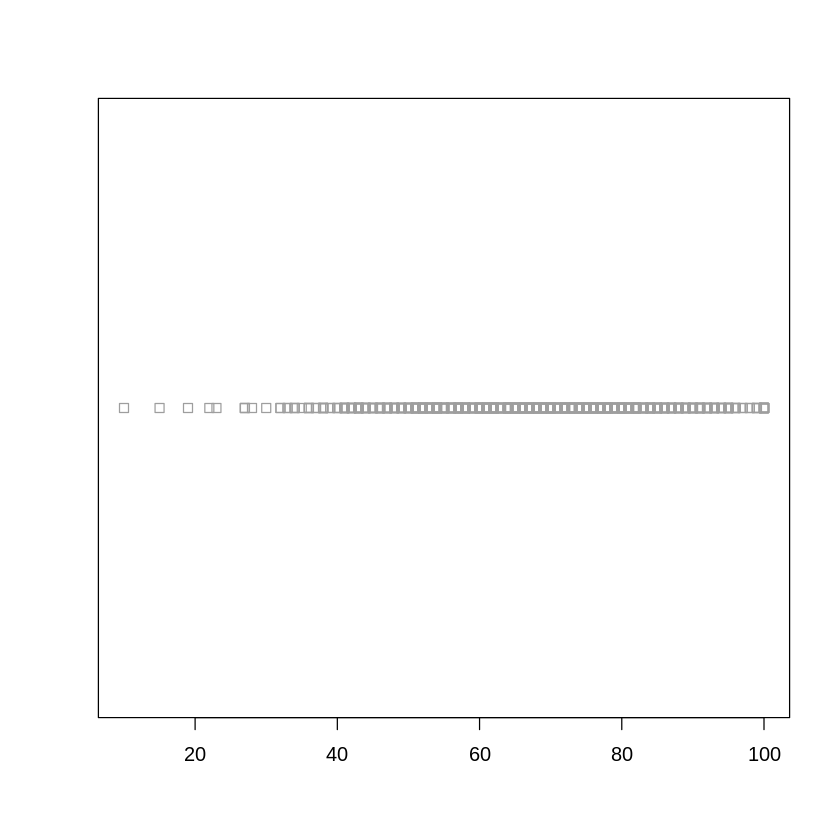

In [20]:
stripchart(df$writing.score, col = 8)

In [21]:
data <- read.csv('avocado.csv')
data1 <- data$Total.Volume
head(data1)
data2 <- data1[1:30]
print(data2)

[1]  64236.62  54876.98 118220.22  78992.15  51039.60  55979.78

 [1]  64236.62  54876.98 118220.22  78992.15  51039.60  55979.78  83453.76
 [8] 109428.33  99811.42  74338.76  84843.44  64489.17  61007.10 106803.39
[15]  69759.01  76111.27  99172.96 105693.84  79992.09  80043.78 111140.93
[22]  75133.10 106757.10  96617.00 124055.31 109252.12  89534.81 104849.39
[29]  89631.30 122743.06


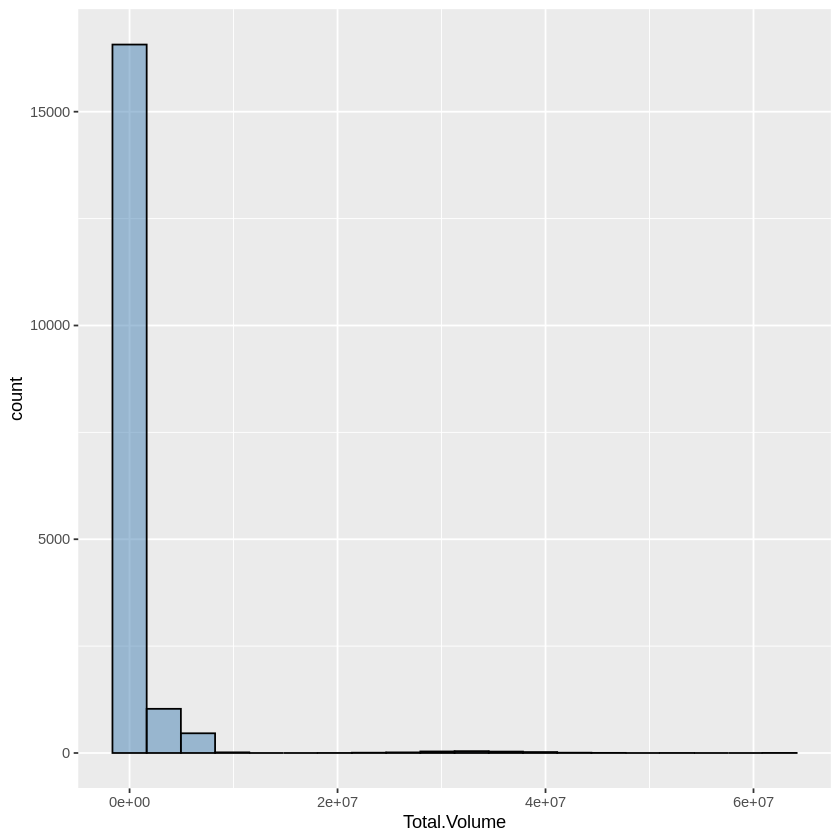

In [22]:
ggplot(data, aes(x = Total.Volume)) + 
  geom_histogram(color = 'black', bins=20, fill = 'steelblue', alpha=0.5)

In [23]:
data3 <- grubbs.test(data1)
print(data3)


	Grubbs test for one outlier

data:  data1
G = 17.85267, U = 0.98253, p-value < 2.2e-16
alternative hypothesis: highest value 62505646.52 is an outlier



In [24]:
idx1 <- data$Total.Volume < sort(data$Total.Volume)[16609]
data3 <- data[idx1,]
data4 <- data3
head(data4)

,Index,Date,AveragePrice,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,type,year,region
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,conventional,2015,Albany
5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
6,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany


In [25]:
max(data4$Total.Volume)

[1] 1731061

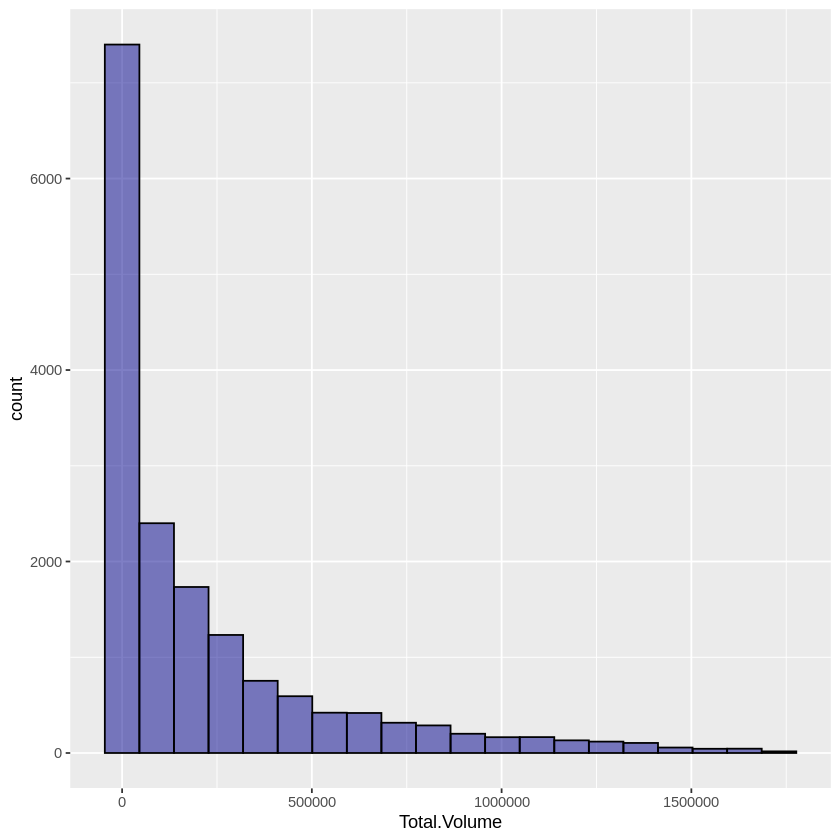

In [26]:
ggplot(data = data4, aes(x = Total.Volume)) + 
  geom_histogram(color = 'black', bins=20, fill = 'darkblue', alpha=0.5)

In [27]:
df = read.csv('speed.csv')
df


generation,speed
<int>,<dbl>
1,28.28
3,29.10
2,30.95
1,31.49
2,32.49
3,32.79
3,32.79
3,31.99
2,31.99


In [28]:
dixon.test(df$speed, type = 10)


	Dixon test for outliers

data:  df$speed
Q = 0.18182, p-value = 0.8449
alternative hypothesis: lowest value 28.28 is an outlier


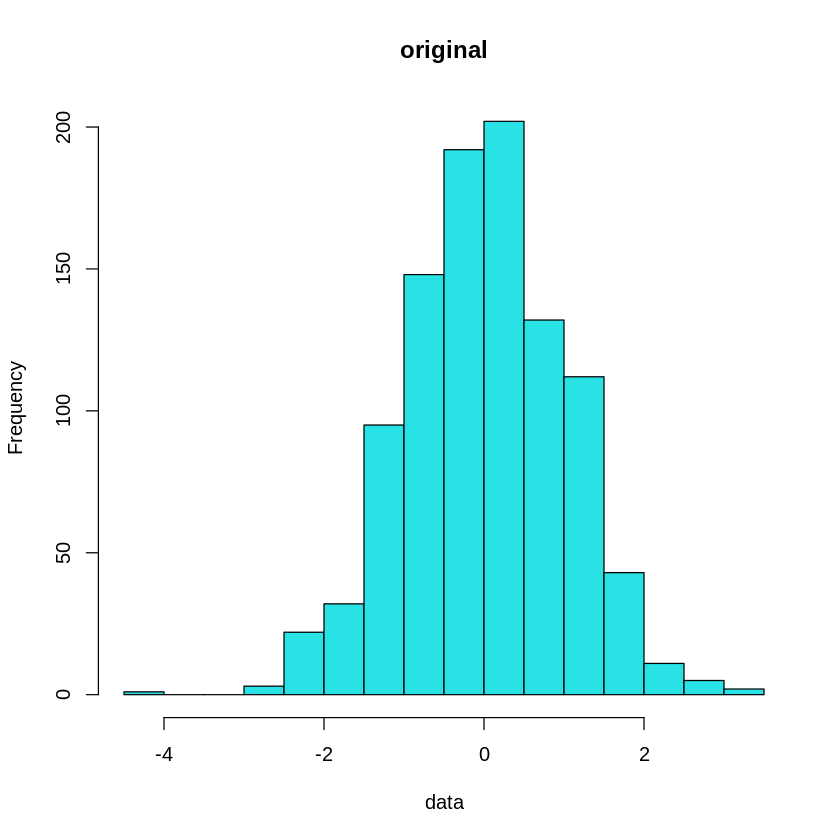

In [29]:
data <- rnorm(1000)
hist(data, main='original', col = 5)

In [30]:
missing_indexes = sample(1:length(data), 25)

In [31]:
data[missing_indexes ] <- NA
print(length(which(is.na(data))))

[1] 25


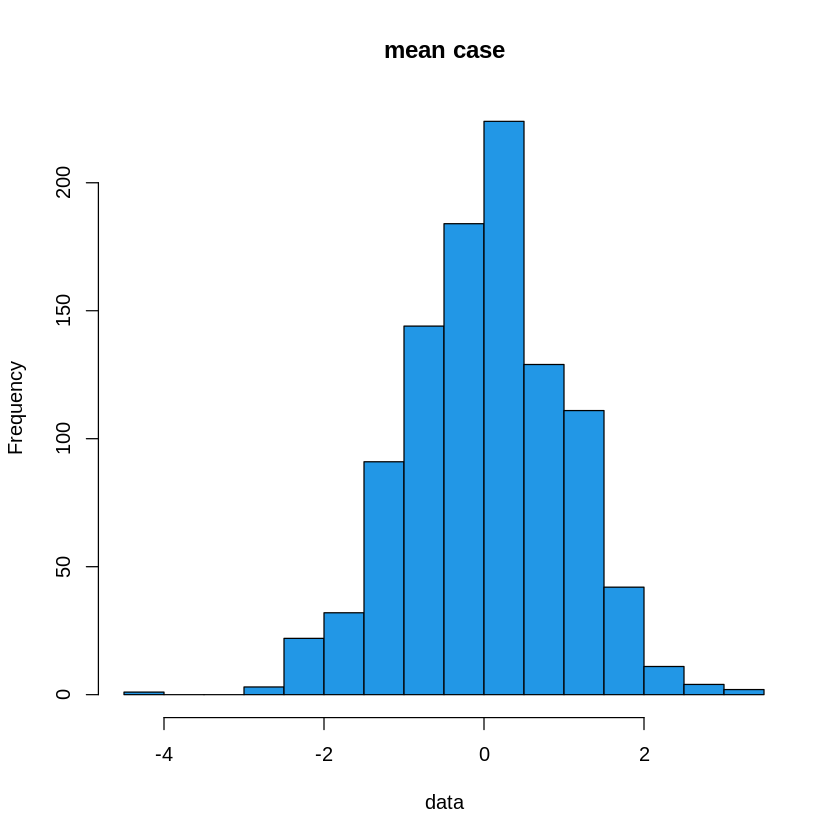

In [32]:
data[missing_indexes] <- mean(data, na.rm = T)
original <- data
actuals <- original[missing_indexes]
predicteds <- rep(mean(data, na.rm=T), length(actuals))
#regr.eval(actuals, predicteds)
hist(data, main='mean case', col = 4)

In [35]:
n = 70
data1 <- matrix(c(sort(rnorm(n, mean = 0, sd = 1)), sort(rnorm(n, mean = 5, sd = 5))), nrow = 2, ncol = n, byrow = TRUE)

data_mle1_1 <- fitdistr(data1[1, ], densfun = "normal")
data_mle1_2 <- fitdistr(data1[2, ], densfun = "normal")

In [36]:
n = 2000
data2 <- matrix(c(sort(rnorm(n, mean = 0, sd = 1)), sort(rnorm(n, mean = 5, sd = 5))), nrow = 2, ncol = n, byrow = TRUE)

data_mle2_1 <- fitdistr(data2[1, ], densfun = "normal")
data_mle2_2 <- fitdistr(data2[2, ], densfun = "normal")

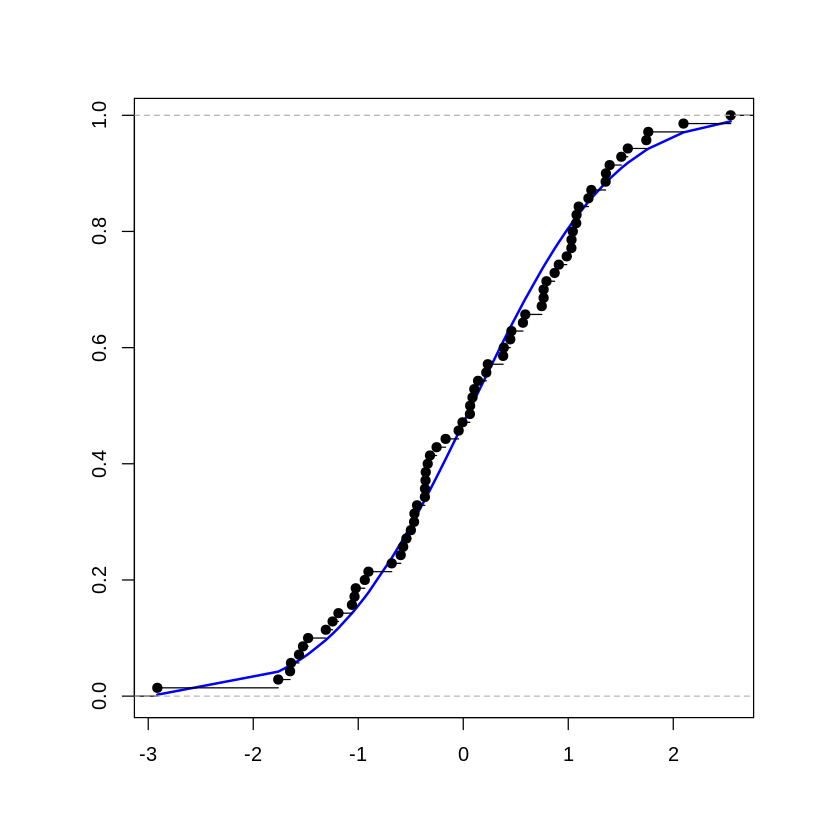

In [37]:
par(mfrow=c(1, 1), pty = "s")
plot(data1[1, ],pnorm(data1[1, ], mean = data_mle1_1$estimate[1], sd = data_mle1_1$estimate[2]),
     type = "l", col = "blue", lwd = 2, xlab = "", ylab = "")
plot(ecdf(data1[1,]), add = T, col = 1)

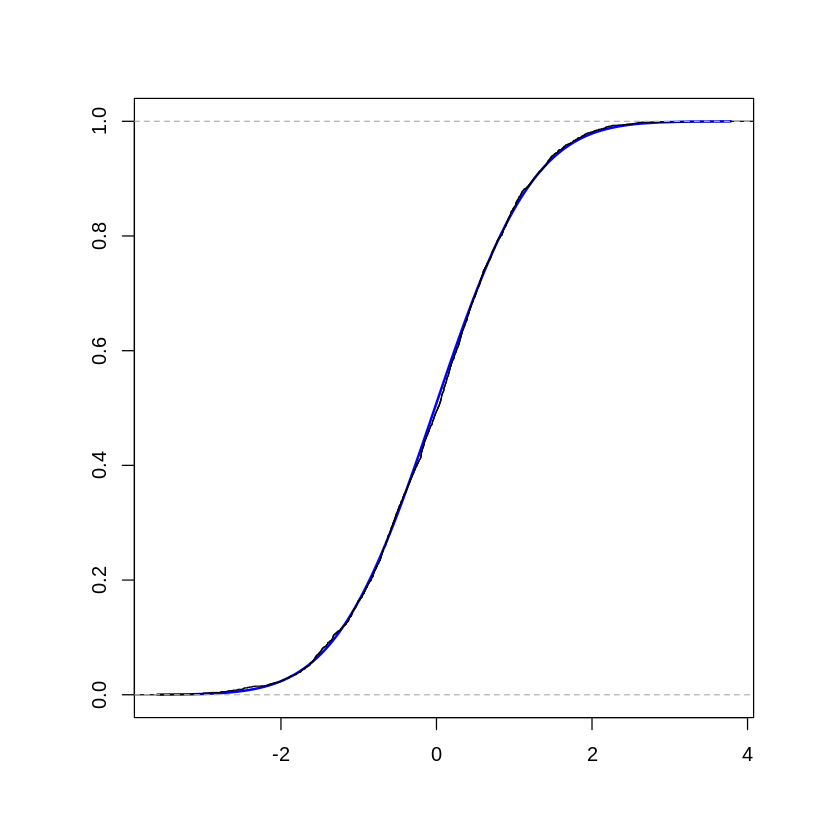

In [38]:
par(mfrow=c(1, 1), pty = "s")
plot(data2[1, ],pnorm(data2[1, ], mean = data_mle2_1$estimate[1], sd = data_mle2_1$estimate[2]),
     type = "l", col = "blue", lwd = 2, xlab = "", ylab = "")
plot(ecdf(data2[1,]), add = T, col = 1)

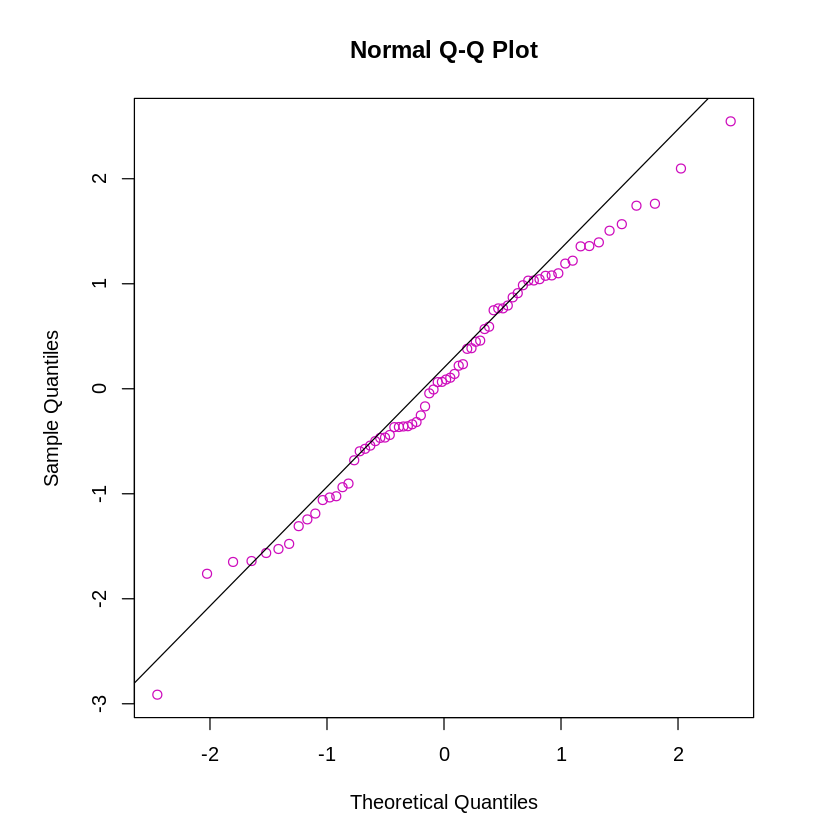

In [39]:
par(mfrow = c(1,1), pty = "s")
qqnorm(data1[1,], col = 6)
qqline(data1[1,], col = 1)

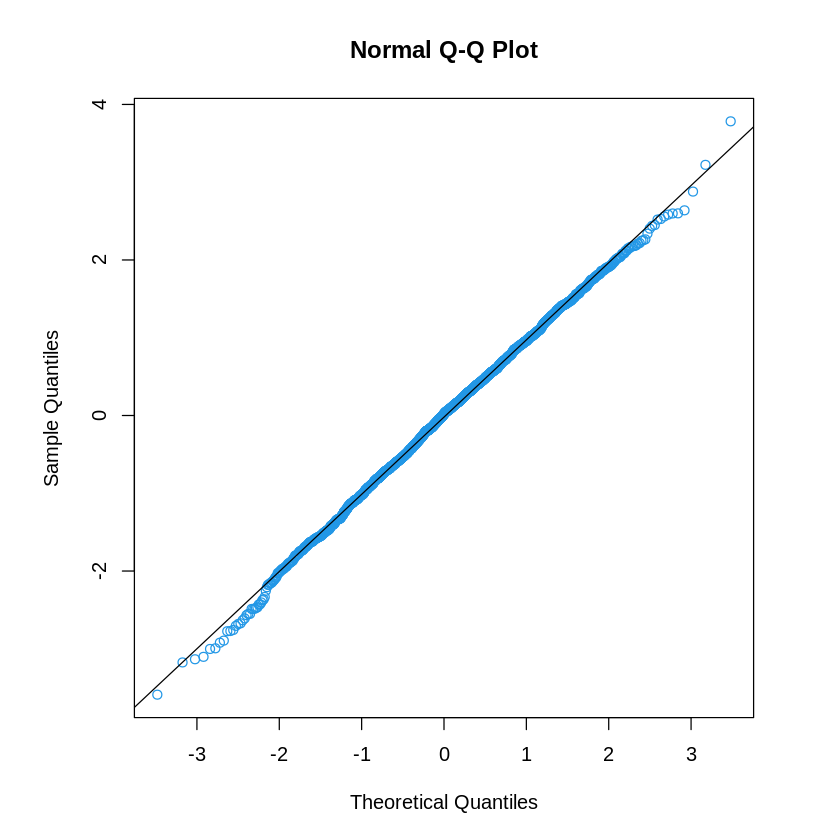

In [40]:
par(mfrow = c(1,1), pty = "s")
qqnorm(data2[1,], col = 4)
qqline(data2[1,], col = 1)

[1]  1 70

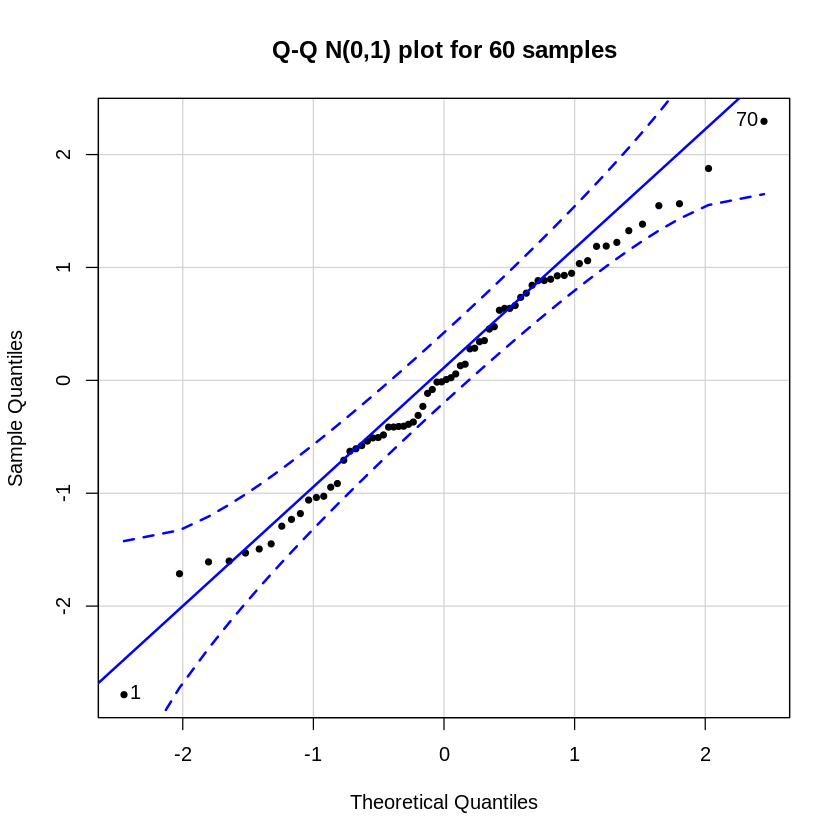

In [44]:
z <- (data1[1,] - mean(data1[1,]))/sqrt(var(data1[1,]))
qqPlot(z, distribution = "norm", envelope = list(style = "lines"), pch = 20,
main = "Q-Q N(0,1) plot for 60 samples", ylab = "Sample Quantiles",
xlab = "Theoretical Quantiles")

[1] 2000    1

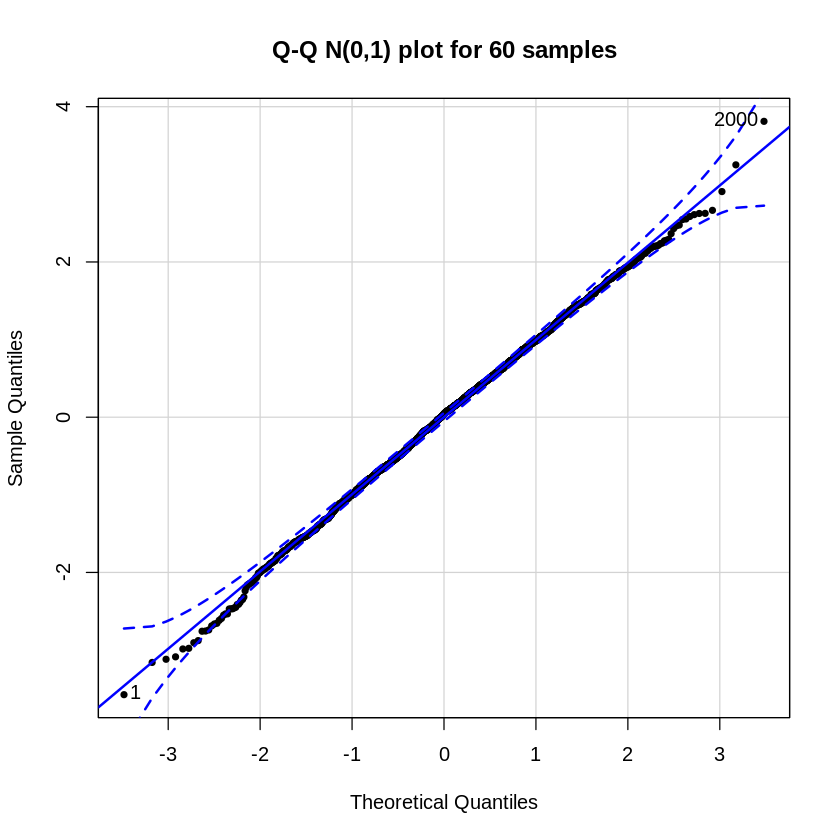

In [45]:
z <- (data2[1,] - mean(data2[1,]))/sqrt(var(data2[1,]))
qqPlot(z, distribution = "norm", envelope = list(style = "lines"), pch = 20,
main = "Q-Q N(0,1) plot for 60 samples", ylab = "Sample Quantiles",
xlab = "Theoretical Quantiles")

In [46]:
ks.test(data1[1, ],pnorm, mean = data_mle1_1$estimate[1], sd = data_mle1_1$estimate[2])
ks.test(data2[1, ],pnorm, mean = data_mle2_1$estimate[1], sd = data_mle2_1$estimate[2])


	Exact one-sample Kolmogorov-Smirnov test

data:  data1[1, ]
D = 0.076935, p-value = 0.7727
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data2[1, ]
D = 0.018563, p-value = 0.4959
alternative hypothesis: two-sided


In [47]:
shapiro.test(data1[1,])
shapiro.test(data2[1,])


	Shapiro-Wilk normality test

data:  data1[1, ]
W = 0.98861, p-value = 0.7798



	Shapiro-Wilk normality test

data:  data2[1, ]
W = 0.99898, p-value = 0.3157


In [48]:
ad.test(data1[1,])
ad.test(data2[1,])


	Anderson-Darling normality test

data:  data1[1, ]
A = 0.29749, p-value = 0.5802



	Anderson-Darling normality test

data:  data2[1, ]
A = 0.45408, p-value = 0.2696


In [49]:
cvm.test(data1[1,])
cvm.test(data2[1,])


	Cramer-von Mises normality test

data:  data1[1, ]
W = 0.04675, p-value = 0.5545



	Cramer-von Mises normality test

data:  data2[1, ]
W = 0.079297, p-value = 0.2115


In [50]:
lillie.test(data1[1,])
lillie.test(data2[1,])


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data1[1, ]
D = 0.075462, p-value = 0.4163



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data2[1, ]
D = 0.018558, p-value = 0.09733


In [51]:
sf.test(data1[2,])
sf.test(data2[2,])


	Shapiro-Francia normality test

data:  data1[2, ]
W = 0.98638, p-value = 0.5583



	Shapiro-Francia normality test

data:  data2[2, ]
W = 0.9992, p-value = 0.4907


In [52]:
data <- read.csv('weight-height.csv')
dh <- data$Height

In [53]:
data <- read.csv('speed.csv')
ds <- data$speed

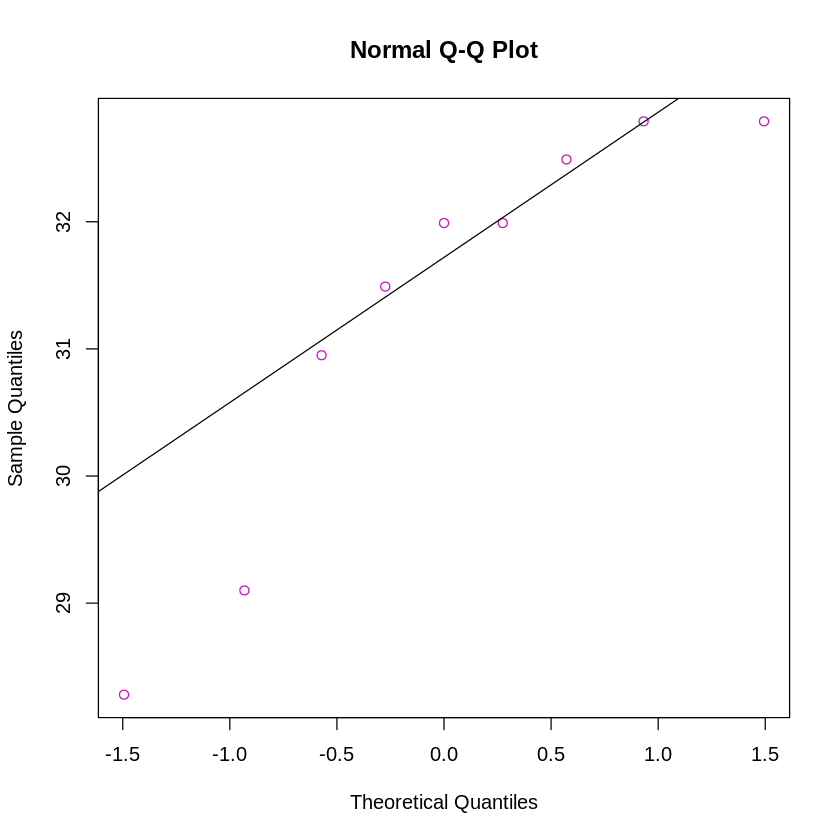

In [54]:
qqnorm(ds, col = 6)
qqline(ds, col = 1)

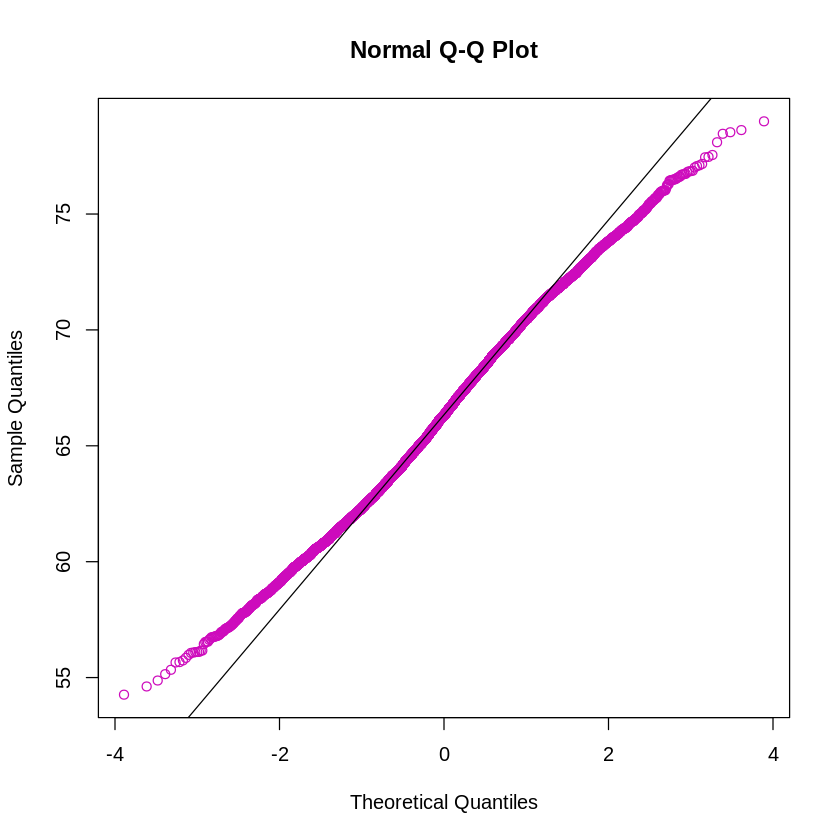

In [55]:
qqnorm(dh, col = 6)
qqline(dh, col = 1)

[1] 1 2

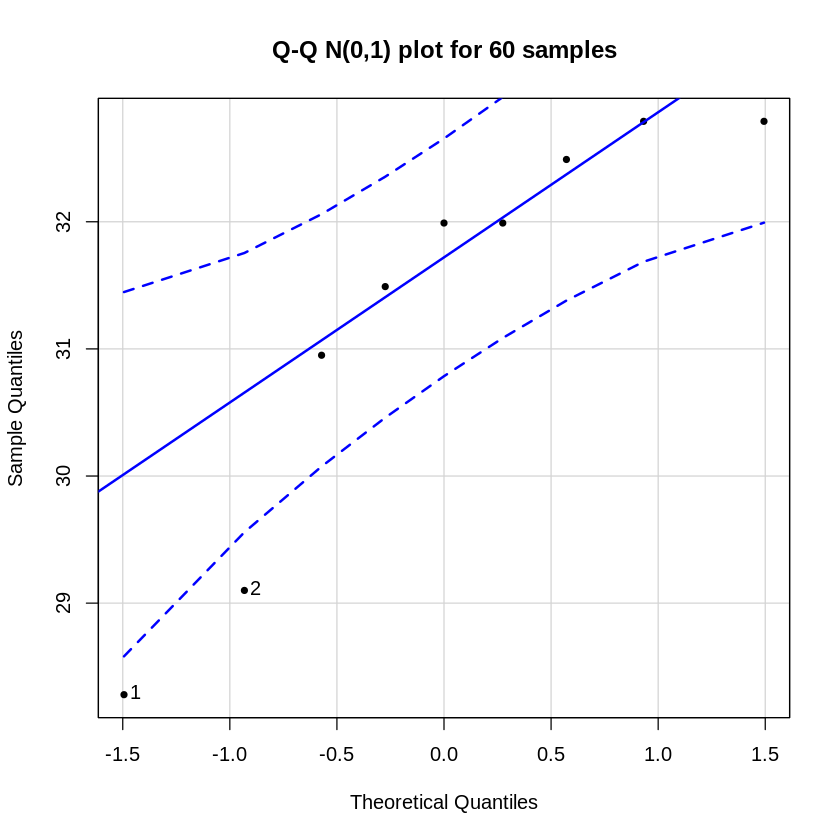

In [56]:
qqPlot(ds, distribution = "norm", envelope = list(style = "lines"), pch = 20,
main = "Q-Q N(0,1) plot for 60 samples", ylab = "Sample Quantiles",
xlab = "Theoretical Quantiles")

In [58]:
ks.test(ds,pnorm)
ks.test(dh,pnorm)

Warning message in ks.test.default(ds, pnorm):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  ds
D = 1, p-value = 3.046e-08
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  dh
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


In [59]:
shapiro.test(ds)


	Shapiro-Wilk normality test

data:  ds
W = 0.84473, p-value = 0.06518


In [61]:
ad.test(ds)
ad.test(dh)


	Anderson-Darling normality test

data:  ds
A = 0.61008, p-value = 0.07671



	Anderson-Darling normality test

data:  dh
A = 12, p-value < 2.2e-16


In [62]:
cvm.test(ds)
cvm.test(dh)


	Cramer-von Mises normality test

data:  ds
W = 0.10381, p-value = 0.08315


Warning message in cvm.test(dh):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”



	Cramer-von Mises normality test

data:  dh
W = 1.9869, p-value = 7.37e-10


In [63]:
lillie.test(ds)
lillie.test(dh)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  ds
D = 0.21647, p-value = 0.2594



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dh
D = 0.025544, p-value = 3.86e-16


In [64]:
sf.test(ds)


	Shapiro-Francia normality test

data:  ds
W = 0.85491, p-value = 0.0761


In [65]:
df <- read.csv('diet.csv')
b <- df$weight_before
a <- df$weight_after

In [66]:
mean(a)
mean(b)

[1] 244.3166

[1] 245.6708

In [67]:
t.test(a, mu = 245)
t.test(b, mu = 244)


	One Sample t-test

data:  a
t = -0.21799, df = 99, p-value = 0.8279
alternative hypothesis: true mean is not equal to 245
95 percent confidence interval:
 238.0957 250.5374
sample estimates:
mean of x 
 244.3166 



	One Sample t-test

data:  b
t = 0.52979, df = 99, p-value = 0.5974
alternative hypothesis: true mean is not equal to 244
95 percent confidence interval:
 239.4132 251.9283
sample estimates:
mean of x 
 245.6708 


In [68]:
t.test(a, b)


	Welch Two Sample t-test

data:  a and b
t = -0.30453, df = 197.99, p-value = 0.761
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.123595   7.415159
sample estimates:
mean of x mean of y 
 244.3166  245.6708 


In [69]:
power.t.test(delta = 3.0,
              sd = 1.8,
              sig.level = 0.05,
              power = 0.8)


     Two-sample t test power calculation 

              n = 6.76095
          delta = 3
             sd = 1.8
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


In [70]:
power.t.test(delta = 3.0,
              sd = 1.8,
              sig.level = 0.01,
              power = 0.8)


     Two-sample t test power calculation 

              n = 10.19047
          delta = 3
             sd = 1.8
      sig.level = 0.01
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


In [71]:
power.t.test(delta = 3.0,
              sd = 1.8,
              sig.level = 0.1,
              power = 0.8)


     Two-sample t test power calculation 

              n = 5.283503
          delta = 3
             sd = 1.8
      sig.level = 0.1
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


In [72]:
length(a)

[1] 100

In [73]:
power.t.test(n = 100,
              delta = 3.0,
              sd = 1.8,
              sig.level = 0.05)


     Two-sample t test power calculation 

              n = 100
          delta = 3
             sd = 1.8
      sig.level = 0.05
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group


In [74]:
power.t.test(n = 100,
              delta = 3.0,
              sd = 1.8,
              sig.level = 0.01)


     Two-sample t test power calculation 

              n = 100
          delta = 3
             sd = 1.8
      sig.level = 0.01
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group


In [75]:
power.t.test(n = 100,
              delta = 5.0,
              sd = 1.8,
              sig.level = 0.1)


     Two-sample t test power calculation 

              n = 100
          delta = 5
             sd = 1.8
      sig.level = 0.1
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group


In [77]:
wilcox.test(a, mu = 245)
wilcox.test(b, mu = 244)


	Wilcoxon signed rank test with continuity correction

data:  a
V = 2480, p-value = 0.8784
alternative hypothesis: true location is not equal to 245



	Wilcoxon signed rank test with continuity correction

data:  b
V = 2676, p-value = 0.6048
alternative hypothesis: true location is not equal to 244


In [78]:
df <- read.csv('speed.csv')
df

generation,speed
<int>,<dbl>
1,28.28
3,29.10
2,30.95
1,31.49
2,32.49
3,32.79
3,32.79
3,31.99
2,31.99


In [79]:
a <- df$speed
b <- df$generation

In [80]:
b1 <- cut(b, breaks = c(0,1,2,3), labels = c("A", "B", "C"))

In [81]:
leveneTest(a ~ b1, location = "mean")

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.6595932,0.5508906
,6,NA,NA


In [82]:
bartlett.test (a ~ b1, data = df)


	Bartlett test of homogeneity of variances

data:  a by b1
Bartlett's K-squared = 1.3248, df = 2, p-value = 0.5156


In [83]:
fligner.test(a ~ b1, data = df)


	Fligner-Killeen test of homogeneity of variances

data:  a by b1
Fligner-Killeen:med chi-squared = 1.876, df = 2, p-value = 0.3914


In [84]:
data <- read.csv("avocado.csv")
head(data)
X = data$X4046
Y = data$X4225

,Index,Date,AveragePrice,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,type,year,region
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,conventional,2015,Albany
5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
6,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany


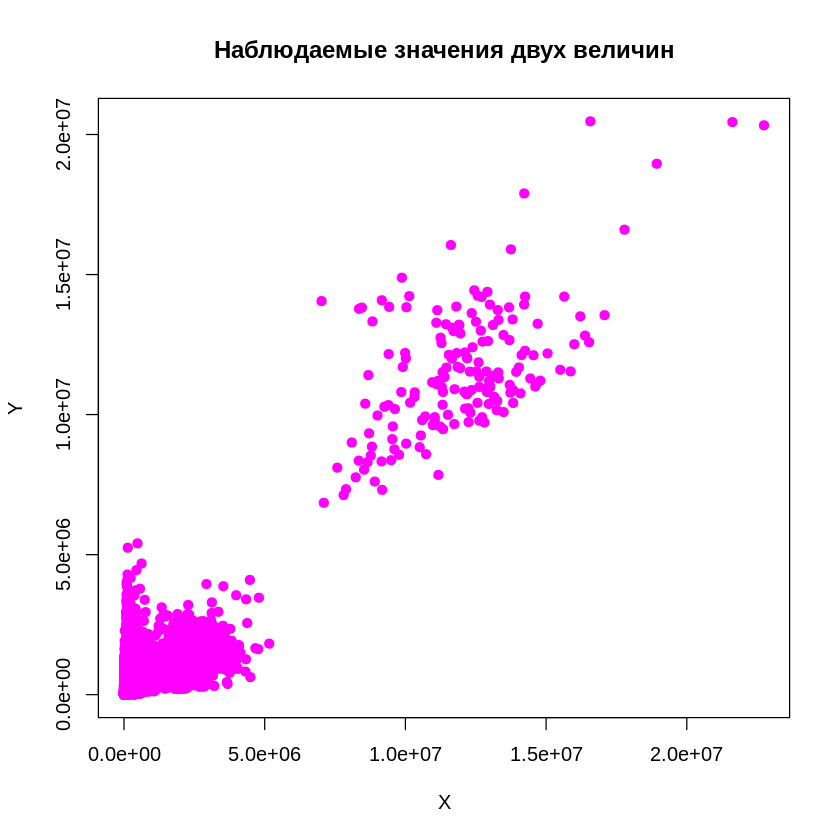

In [85]:
plot(Y ~ X, pch = 19, col = "magenta", main = "Наблюдаемые значения двух величин") 

In [86]:
attach(data)
 
cor.test(X, Y)


	Pearson's product-moment correlation

data:  X and Y
t = 331.61, df = 18247, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9240169 0.9281475
sample estimates:
    cor 
0.92611 


In [87]:
cor.test(X, Y, method = "spearman")

Warning message in cor.test.default(X, Y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  X and Y
S = 2.0872e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7939392 


In [88]:
cor.test(X, Y, method = "kendall")


	Kendall's rank correlation tau

data:  X and Y
z = 120.08, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5927206 


In [89]:
data <- read.csv("StudentsPerformance.csv")
a <- data$gender #выделили столбец gender
b <- data$test #выделили столбец test preparation course
x = table(data$gender, data$test) #кросс-таблица
head(x)
chisq.test(x)

        
         completed none
  female       184  334
  male         174  308


	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 0.015529, df = 1, p-value = 0.9008


In [90]:
x = table(data$gender, data$lunch) 
head(x)
fisher.test(x)

        
         free/reduced standard
  female          189      329
  male            166      316


	Fisher's Exact Test for Count Data

data:  x
p-value = 0.509
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8366388 1.4297884
sample estimates:
odds ratio 
  1.093467 


In [91]:
x = table(data$gender, data$test)
head(x)
mcnemar.test(x)

        
         completed none
  female       184  334
  male         174  308


	McNemar's Chi-squared test with continuity correction

data:  x
McNemar's chi-squared = 49.766, df = 1, p-value = 1.732e-12


In [92]:
df <- read.csv('survey.csv')
head(df)
lst1 = list() 
for(i in 1:ncol(df)) {     
  lst1[[i]] <- df[ , i]   
}
 
names(lst1) = colnames(df) 
arr = array(unlist(lst1),
            dim = c(3, 3, 3))
print(arr)

,gender,A,B
,<chr>,<chr>,<chr>
1,male,no,yes
2,male,yes,yes
3,male,yes,yes
4,male,yes,yes
5,male,yes,yes
6,male,no,yes


, , 1

     [,1]   [,2]   [,3]    
[1,] "male" "male" "male"  
[2,] "male" "male" "male"  
[3,] "male" "male" "female"

, , 2

     [,1]     [,2]     [,3]    
[1,] "female" "female" "female"
[2,] "female" "female" "female"
[3,] "female" "female" "female"

, , 3

     [,1]  [,2]  [,3] 
[1,] "no"  "yes" "yes"
[2,] "yes" "yes" "no" 
[3,] "yes" "no"  "yes"



In [93]:
drug <-
  array(c(11, 10, 25, 27,
          16, 22, 4, 10,
          14, 7, 5, 12,
          2, 1, 14, 16,
          6, 0, 11, 12,
          1, 0, 10, 10,
          1, 1, 4, 8,
          4, 6, 2, 1),
        dim = c(2, 2, 8),
        dimnames = list(
          Group = c("Drug", "Control"),
          Response = c("Success", "Failure"),
          Center = c("1", "2", "3", "4", "5", "6", "7", "8")))
drug

, , Center = 1

         Response
Group     Success Failure
  Drug         11      25
  Control      10      27

, , Center = 2

         Response
Group     Success Failure
  Drug         16       4
  Control      22      10

, , Center = 3

         Response
Group     Success Failure
  Drug         14       5
  Control       7      12

, , Center = 4

         Response
Group     Success Failure
  Drug          2      14
  Control       1      16

, , Center = 5

         Response
Group     Success Failure
  Drug          6      11
  Control       0      12

, , Center = 6

         Response
Group     Success Failure
  Drug          1      10
  Control       0      10

, , Center = 7

         Response
Group     Success Failure
  Drug          1       4
  Control       1       8

, , Center = 8

         Response
Group     Success Failure
  Drug          4       2
  Control       6       1

In [94]:
data <- data.frame(df$horror, df$comedy, df$docu, df$roman)
cor(data)

<0 x 0 matrix>

In [96]:
df <- read.csv('FilmPreferences2123.csv')

In [97]:
model <- lm(age ~ thriller+horror+comedy+adventur+docu+roman+munt, data = df)
summary(model)
vif(model)


Call:
lm(formula = age ~ thriller + horror + comedy + adventur + docu + 
    roman + munt, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.261  -8.731  -2.123   7.391  33.269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  31.9897    12.5455   2.550   0.0118 *
thriller     -1.5113     0.6615  -2.285   0.0238 *
horror       -0.7439     0.5295  -1.405   0.1622  
comedy       -0.2710     0.8053  -0.337   0.7369  
adventur      0.5558     1.0002   0.556   0.5793  
docu          1.2212     0.6061   2.015   0.0458 *
roman         1.3326     0.7467   1.785   0.0765 .
munt         -1.1505     2.1080  -0.546   0.5861  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.52 on 142 degrees of freedom
Multiple R-squared:  0.243,	Adjusted R-squared:  0.2056 
F-statistic:  6.51 on 7 and 142 DF,  p-value: 1.152e-06


thriller   horror   comedy adventur     docu    roman     munt 
1.954779 1.764257 1.196507 1.210824 1.163652 1.471254 1.056583

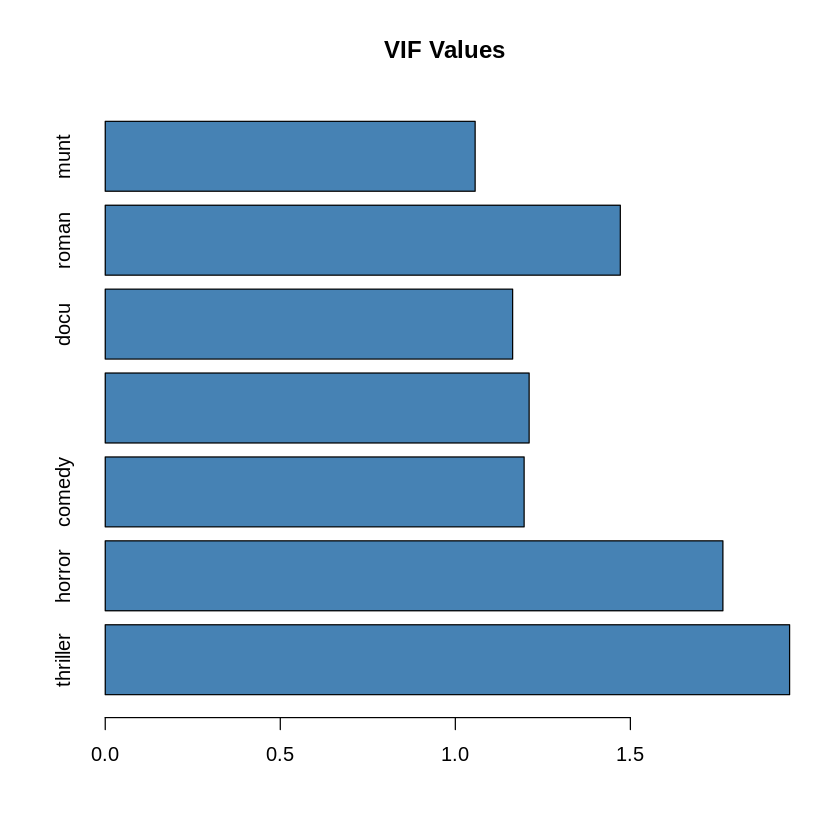

In [98]:
vif_values <- vif(model)

barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue")

abline(v = 5, lwd = 3, lty = 2) 

In [99]:
data <- read.csv("StudentsPerformance.csv")
x = table(data$math, data$race)
head(x)
names(data)

    
     group A group B group C group D group E
  0        0       0       1       0       0
  8        0       1       0       0       0
  18       0       1       0       0       0
  19       0       1       0       0       0
  22       0       0       1       0       0
  23       0       1       0       0       0

[1] "gender"                      "race.ethnicity"             
[3] "parental.level.of.education" "lunch"                      
[5] "test.preparation.course"     "math.score"                 
[7] "reading.score"               "writing.score"

In [107]:
aov_model = aov(data$math.score ~ data$race.ethnicity)
summary(aov_model)

                     Df Sum Sq Mean Sq F value   Pr(>F)    
data$race.ethnicity   4  12729    3182   14.59 1.37e-11 ***
Residuals           995 216960     218                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [108]:
data <- read.csv("student_scores.csv")
attach(data)

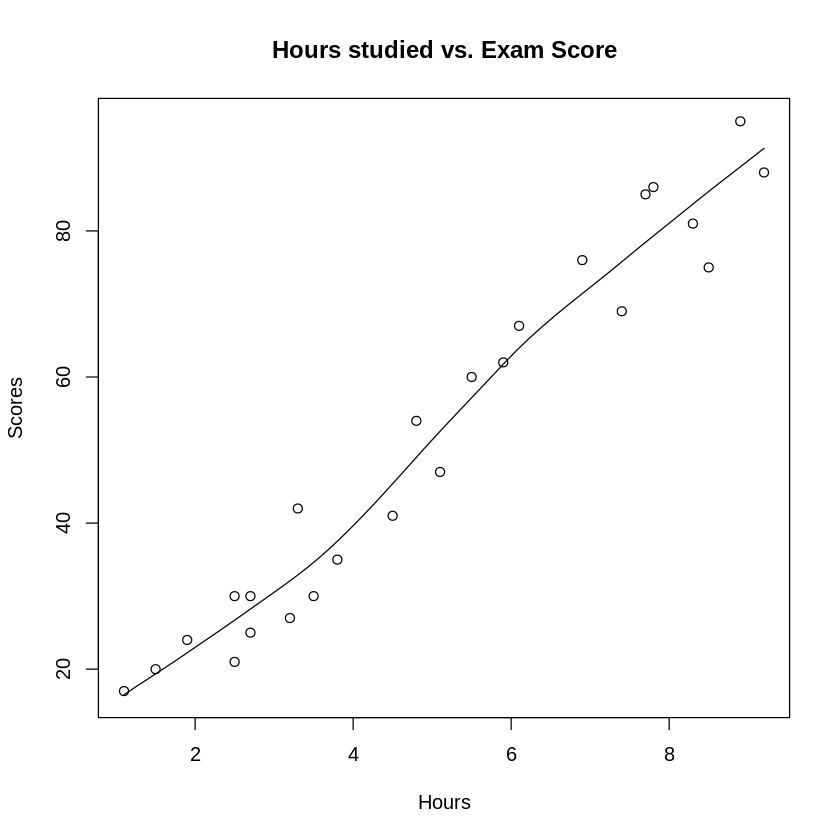

In [109]:
scatter.smooth(Hours, Scores, main='Hours studied vs. Exam Score')

In [110]:
model <- lm(Scores~Hours)
summary(model)


Call:
lm(formula = Scores ~ Hours)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


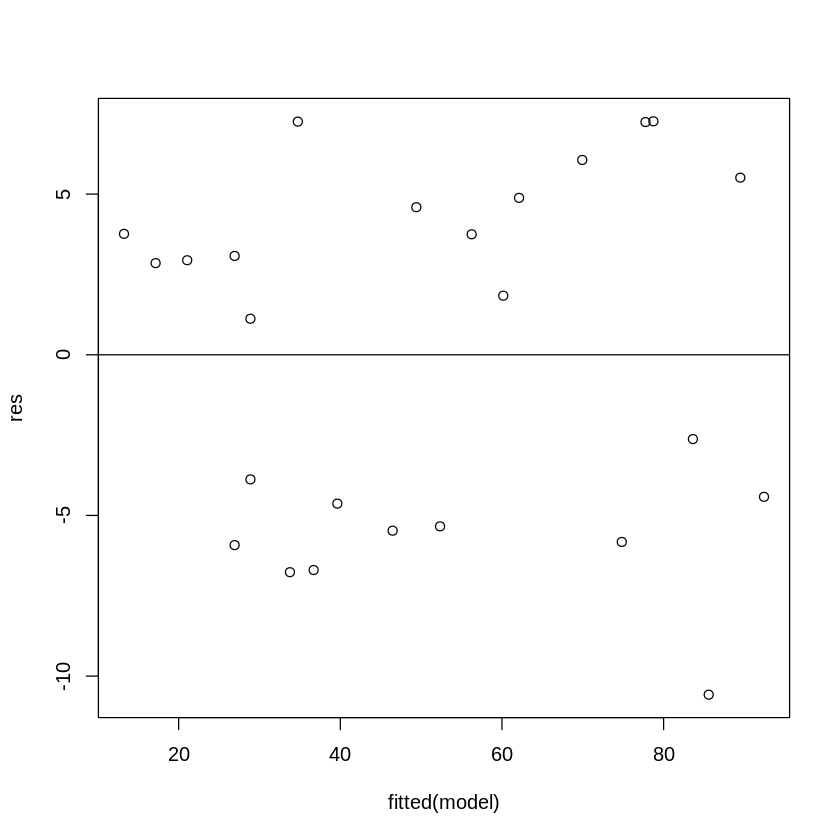

In [111]:
res <- resid(model)

plot(fitted(model), res)

abline(0,0)

[1]  4 25

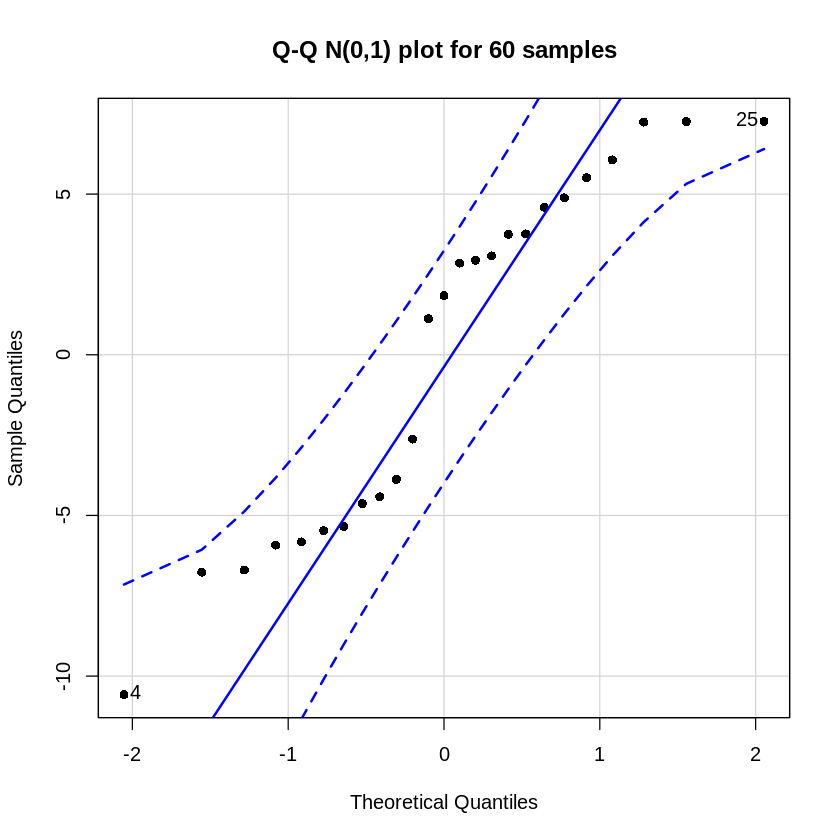

In [112]:
qqPlot(res, distribution = "norm", envelope = list(style = "lines"), pch = 16,
main = "Q-Q N(0,1) plot for 60 samples", ylab = "Sample Quantiles",
xlab = "Theoretical Quantiles")